##Langkah 1 Import Libraries
Masukan dan panggil library dan modul yang dibutuhkan

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt


##Langkah 2 Load and Visualize the MNIST Dataset
Jalankan MNIST Dataset dan visualisasikan

100%|██████████| 9912422/9912422 [00:00<00:00, 117316927.33it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 105518897.06it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 50059291.78it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 9714701.05it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



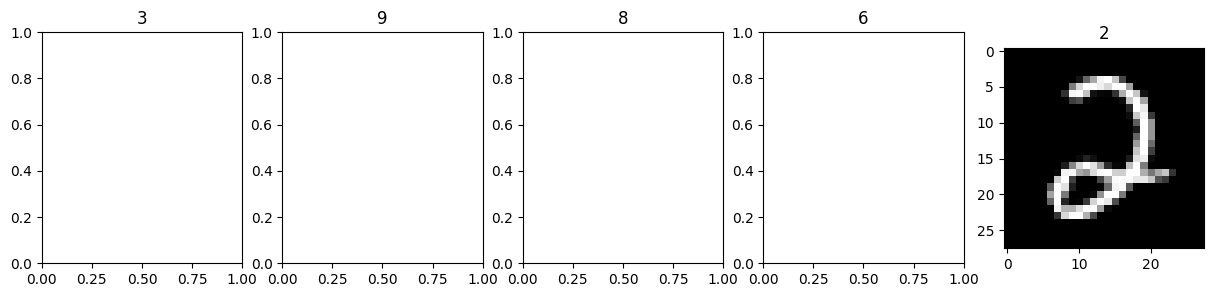

In [ ]:
# Define data transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the MNIST training and testing datasets
train_dataset = datasets.MNIST('data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST('data', train=False, transform=transform, download=True)

# Create data loaders
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Visualize some examples
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    plt.imshow(img.squeeze(), cmap='gray')

dataiter = iter(train_loader)
images, labels = next(dataiter)

# Display a few images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axes[i].set_title(labels[i].item())
    imshow(images[i])


##Langkah 3 Define the Neural Network Model
Desain feedforward neural network model sederhana

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Create an instance of the model
model = SimpleNN()


##Langkah 4 Define Loss Function, Optimizer, and Hyperparameters
mencari loss function, optimizer dan hyperparameter yang terjadi

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
num_epochs = 10


##Langkah 5 Training Loop
Melakukan Trining model

In [ ]:
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Calculate loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        running_loss += loss.item()

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_loader)}')


Epoch 1/10, Loss: 1.045094030275782
Epoch 2/10, Loss: 0.38615690205079406
Epoch 3/10, Loss: 0.32281766047895843
Epoch 4/10, Loss: 0.29040855951686656
Epoch 5/10, Loss: 0.26541231398675236
Epoch 6/10, Loss: 0.2440595491918356
Epoch 7/10, Loss: 0.22449837458619812
Epoch 8/10, Loss: 0.20681721434743802
Epoch 9/10, Loss: 0.1910484365975933
Epoch 10/10, Loss: 0.17706519020979467


## Langkah 6 Evaluate the Model
ini dilakukan agar traiing model bisa mendapatkan hasil yang maksimal

In [ ]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.tolist())
        all_labels.extend(labels.tolist())

# Calculate accuracy
accuracy = accuracy_score(all_labels, all_preds)

# Calculate confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)

# Calculate other performance metrics (precision, recall, F1-score)
classification_rep = classification_report(all_labels, all_preds)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.9484
Confusion Matrix:
[[ 965    0    1    1    0    4    7    1    1    0]
 [   0 1117    3    2    0    1    4    2    6    0]
 [  11    2  967   12    5    0   13   11   10    1]
 [   3    1   14  955    0   14    1   10    9    3]
 [   1    1    4    0  924    0   14    1    2   35]
 [   9    2    1   14    3  833   15    0    8    7]
 [   8    3    2    0    4    8  931    1    1    0]
 [   3    8   20    8    4    1    0  957    0   27]
 [   6    3    6   21   10   11   14    9  886    8]
 [  10    4    1   11   18    7    1    7    1  949]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.95      0.94      0.94      1032
           3       0.93      0.95      0.94      1010
           4       0.95      0.94      0.95       982
           5       0.95      0.93      0.94       892
           6       0.93      0.9

## Langkah 7 Kesimpulan dari data MNIST yang telah dilakukan
Dalam alur kerja ini, telah berhasil mengimplementasikan jaringan saraf maju sederhana untuk klasifikasi digit tulisan tangan MNIST menggunakan PyTorch. Berikut beberapa poin penting tentang hasilnya:

Akurasi: Skor akurasi memberi tahu kita sejauh mana kinerja model dalam hal mengklasifikasikan digit dengan benar. Ini memberi kita gagasan umum tentang kinerja model, dan dalam kasus ini, seharusnya cukup tinggi.

Matriks Konfusi: Matriks konfusi memberikan pemecahan rinci tentang berapa banyak digit yang diklasifikasikan dengan benar dan dengan salah untuk setiap kelas (0 hingga 9). Ini membantu mengidentifikasi di mana model mungkin membuat lebih banyak kesalahan.

Laporan Klasifikasi: Laporan klasifikasi mencakup metrik tambahan seperti presisi, recall, dan skor F1 untuk setiap kelas. Ini dapat memberikan wawasan tentang kinerja model pada kelas-kelas digit individual.

Untuk meningkatkan model lebih lanjut, kita dapat melakukan percobaan dengan berbagai hiperparameter, arsitektur jaringan, atau menggunakan teknik yang lebih canggih seperti jaringan saraf konvolusi (CNN) untuk kinerja yang lebih baik dalam tugas klasifikasi gambar seperti MNIST.